<a href="https://www.kaggle.com/code/yutodennou/tips-get-stock-data?scriptVersionId=176329373" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id="1"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34); background-color:rgb(255,255,255); "> <b> 1. Purpose🎉 </b></div>

Get **practical time-series data** easily and improve your analytical skills. One of the most typical data is stock prices.  
With this notebook, you can easily get data on stock prices.  
Here we use **Yahoo! Finance API** as a library.  
And I also note a simple example of time-series data analysis using **Prophet**.
You can learn more about prophet from this link.
🔍 https://www.kaggle.com/code/yutodennou/tips-try-prophet-for-beginners

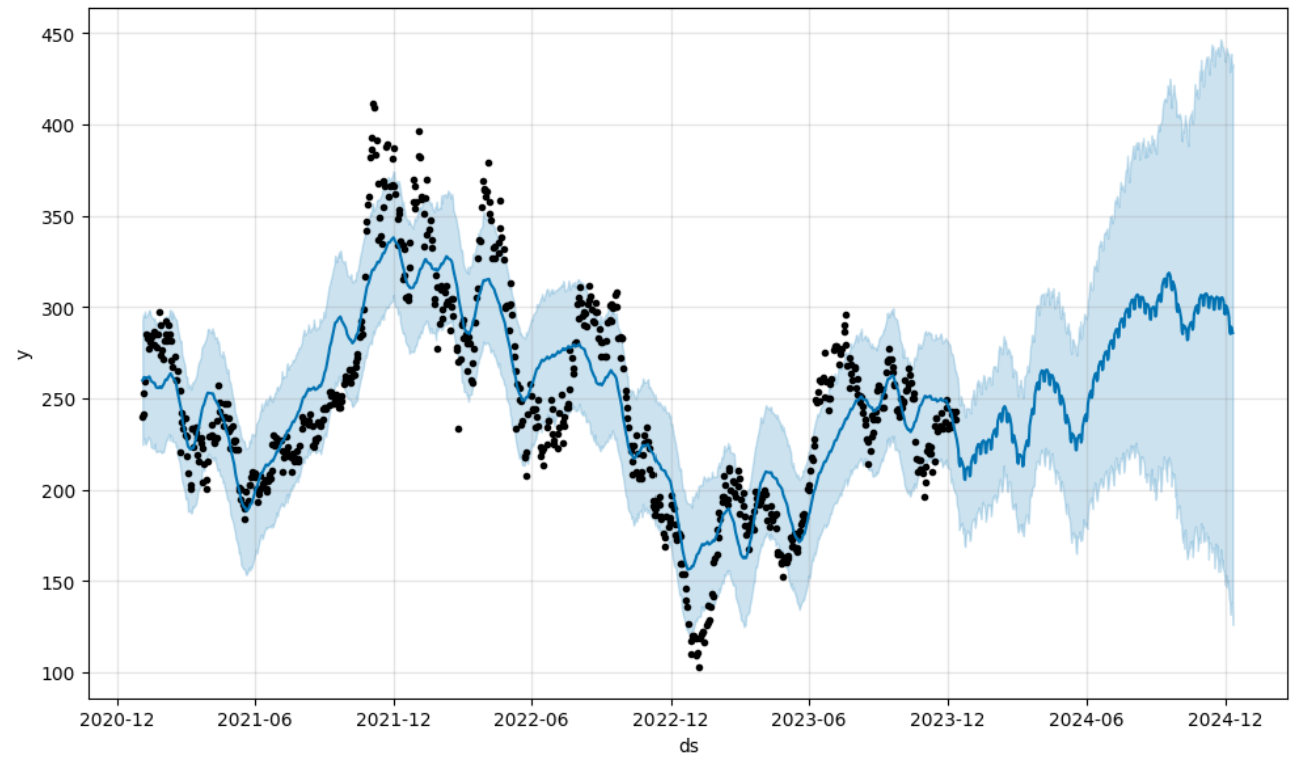

<a id="2"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34); background-color:rgb(255,255,255); "> <b> 2. Import Libs🗃️ </b></div>

In [ ]:
# use Yahoo! finance API 
!pip install yfinance
import yfinance as yf
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

<a id="3"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34); background-color:rgb(255,255,255); "> <b> 3. Get Market Data🔍 </b></div>

Access ticker data and it has stock info

In [ ]:
target = "TSLA" # any stock name here
stock = yf.Ticker(target) # access ticker data
stock.info # get all stock info

Historical data is contained 'Ticker.history'  
You can select period like from '[1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max]'

In [ ]:
hist = stock.history(period="max") # get historical market data
stock.history_metadata # show meta information about the history

This is the data we use for time series prediction

In [ ]:
hist.head(15) # use this time series data

<a id="4"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34); background-color:rgb(255,255,255); "> <b> 4. Visualize Example📈 </b></div>

Using 'Prophet' below.  
If you'd like to know detail technique about the library, please refer to my notebook here:  
🔍 https://www.kaggle.com/code/yutodennou/tips-try-prophet-for-beginners  

In [ ]:
!pip install prophet
from prophet import Prophet
import matplotlib.pyplot as plt

In [ ]:
hist['ds'] = hist.index.copy()
hist['ds'] = hist['ds'].dt.tz_localize(None)
hist['y'] = hist['Open'].copy()
model = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True
)
model.fit(hist)
future_df = model.make_future_dataframe(365)
forecast_df = model.predict(future_df)
model.plot(forecast_df)
plt.show()

This doesn't fit well especially from 2021.  
So, now let's focus on recent trend below: 

In [ ]:
hist_recent = hist[hist['ds']>'2021'] # get historical market data
model = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True
)
model.fit(hist_recent)
future_df = model.make_future_dataframe(365)
forecast_df = model.predict(future_df)
model.plot(forecast_df)
plt.show()

In [ ]:
import numpy as np
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Perform cross-validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')

# Calculate performance metrics
df_metrics = performance_metrics(df_cv)

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(df_cv['y'], df_cv['yhat'])
mse = mean_squared_error(df_cv['y'], df_cv['yhat'])
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

<a id="-"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34); background-color:rgb(255,255,255); "> <b> ✍Tips: get other information </b></div>

Ticker module has other interesting information

### Show actions

In [ ]:
print('actions: ', stock.actions) # show actions
print('dividends: ', stock.dividends) # show dividends
print('splits: ', stock.splits) # show splits
print('capital gains: ', stock.capital_gains) # show capital gain

### Share count

In [ ]:
stock.get_shares_full(start="2023-01-01", end=None) # show share count

### Income statement

In [ ]:
stock.get_income_stmt() # get income statement

In [ ]:
# show financials:
# - income statement
print('income statement: ', stock.income_stmt)
print('4q income statement: ', stock.quarterly_income_stmt)
# - balance sheet
print('balance sheet: ', stock.balance_sheet)
print('4q balance sheet: ', stock.quarterly_balance_sheet)
# - cash flow statement
print('cashflow: ', stock.cashflow)
print('4q cashflow: ', stock.quarterly_cashflow)

### Major holders

In [ ]:
stock.major_holders # show holders

### Earnings dates

In [ ]:
# Show future and historic earnings dates, returns at most next 4 quarters and last 8 quarters by default. 
# Note: If more are needed use msft.get_earnings_dates(limit=XX) with increased limit argument.
stock.earnings_dates

### Options

In [ ]:
stock.options # show options expirations

### News

In [ ]:
stock.news # show news